In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [20]:
mat3 = loadmat('ex8_movieParams.mat')
mat4 = loadmat('ex8_movies.mat')
Y = mat4['Y']
R = mat4['R']
X = mat3['X']
Theta = mat3['Theta']

In [21]:
Y

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


Text(0, 0.5, 'Movies')

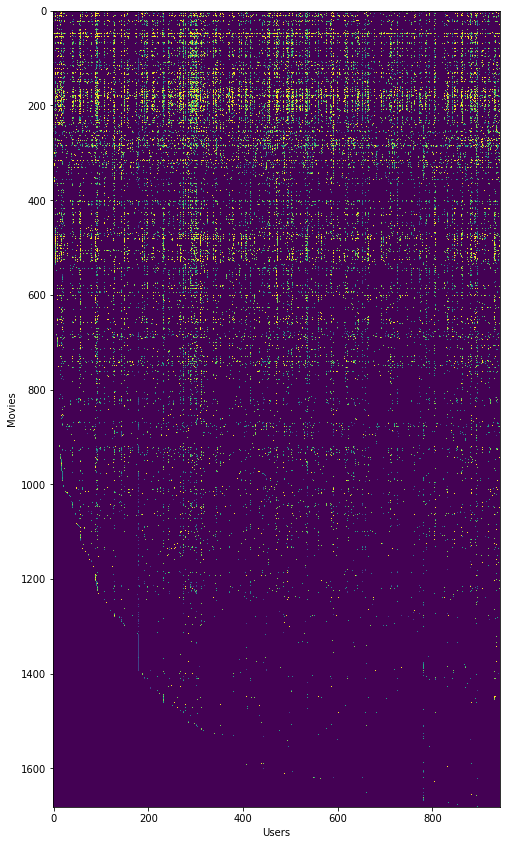

In [4]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel('Users')
plt.ylabel('Movies')

In [30]:
# parameters as a vector

def costFunction(params, Y,R, num_users, num_movies, num_features, Lambda):
    
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    
    predictions = X@ Theta.T
    err = predictions-Y
    J = 1/2 *np.sum((err**2)*R)
    
    reg_X = Lambda/2 *np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J+reg_X+reg_Theta
    
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(), Theta_grad.flatten())
    
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return J,grad, reg_J, reg_grad, err
    


In [6]:
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())

J, grad = costFunction(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Custo sobre os parâmetros carregados:",J)

J2, grad2 = costFunction(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Custo sobre os parâmetros carregados (lambda = 1.5):",J2)

Custo sobre os parâmetros carregados: 22.224603725685675
Custo sobre os parâmetros carregados (lambda = 1.5): 31.34405624427422


In [7]:
movieList = open("movie_ids.txt","r").read().split("\n")[:-1]
movieList

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7 Twelve Monkeys (1995)',
 '8 Babe (1995)',
 '9 Dead Man Walking (1995)',
 '10 Richard III (1995)',
 '11 Seven (Se7en) (1995)',
 '12 Usual Suspects, The (1995)',
 '13 Mighty Aphrodite (1995)',
 '14 Postino, Il (1994)',
 "15 Mr. Holland's Opus (1995)",
 '16 French Twist (Gazon maudit) (1995)',
 '17 From Dusk Till Dawn (1996)',
 '18 White Balloon, The (1995)',
 "19 Antonia's Line (1995)",
 '20 Angels and Insects (1995)',
 '21 Muppet Treasure Island (1996)',
 '22 Braveheart (1995)',
 '23 Taxi Driver (1976)',
 '24 Rumble in the Bronx (1995)',
 '25 Birdcage, The (1996)',
 '26 Brothers McMullen, The (1995)',
 '27 Bad Boys (1995)',
 '28 Apollo 13 (1995)',
 '29 Batman Forever (1995)',
 '30 Belle de jour (1967)',
 '31 Crimson Tide (1995)',
 '32 Crumb (1994)',
 '33 Desperado (1995)',
 '34 Doom Generation, The (1995)',
 '35

In [8]:
# simulations of a new user's rating

my_ratings = np.zeros((1682,1))

my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("Notas do novo usuário:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Nota",int(my_ratings[i]),"para o índice",movieList[i])

Notas do novo usuário:

Nota 4 para o índice 1 Toy Story (1995)
Nota 3 para o índice 7 Twelve Monkeys (1995)
Nota 5 para o índice 12 Usual Suspects, The (1995)
Nota 4 para o índice 54 Outbreak (1995)
Nota 5 para o índice 64 Shawshank Redemption, The (1994)
Nota 3 para o índice 66 While You Were Sleeping (1995)
Nota 5 para o índice 69 Forrest Gump (1994)
Nota 4 para o índice 83 Much Ado About Nothing (1993)
Nota 2 para o índice 98 Silence of the Lambs, The (1991)
Nota 5 para o índice 226 Die Hard 2 (1990)
Nota 5 para o índice 355 Sphere (1998)


In [9]:
# normalize the ratings, to eliminate the case when some user doesnt rate film

def normalizeRatings(Y, R):
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        # mean of each film
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        # subtracting mean to each rated film
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean


In [46]:
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):

    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    error = []
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad, err = costFunction(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
        error.append(np.linalg.norm(err,1))
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history, error

In [33]:
# matrix Y with new rating

Y = np.hstack((my_ratings,Y))


# appends values with rating different to 0 (with rating)
R =np.hstack((my_ratings!=0,R))

Ynorm, Ymean = normalizeRatings(Y, R)

In [47]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
# random initial X
X = np.random.randn(num_movies, num_features)
# random initial theta
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

paramsFinal, J_history, error = gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lambda)

Text(0.5, 1.0, 'Função de Custo usando Gradiente Descendente')

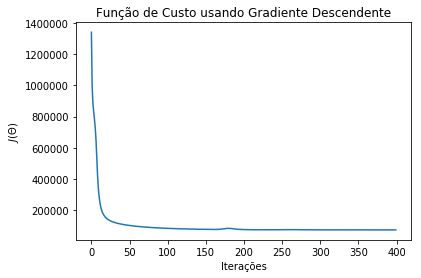

In [49]:
plt.plot(J_history)
plt.xlabel("Iterações")
plt.ylabel("$J(\Theta)$")
plt.title("Função de Custo usando Gradiente Descendente")

In [14]:
J_history[-1]

74112.31317007338

In [29]:
# final values for X and theta
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

# predictions

p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean

In [21]:
import pandas as pd
#create the data frame
df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))

#sort the data, but inplace, this is, without create a new temporal matrix
df.sort_values(by=[0],ascending=False,inplace=True)
# restart the index of data frame
df.reset_index(drop=True,inplace=True)

In [22]:
print("Melhores recomendações para você:\n")
for i in range(10):
    print("Nota predita",round(float(df[0][i]),1)," para o índice",df[1][i])

Melhores recomendações para você:

Nota predita 8.5  para o índice 64 Shawshank Redemption, The (1994)
Nota predita 8.3  para o índice 318 Schindler's List (1993)
Nota predita 8.2  para o índice 313 Titanic (1997)
Nota predita 8.2  para o índice 12 Usual Suspects, The (1995)
Nota predita 8.2  para o índice 174 Raiders of the Lost Ark (1981)
Nota predita 8.1  para o índice 272 Good Will Hunting (1997)
Nota predita 8.0  para o índice 22 Braveheart (1995)
Nota predita 8.0  para o índice 172 Empire Strikes Back, The (1980)
Nota predita 8.0  para o índice 408 Close Shave, A (1995)
Nota predita 8.0  para o índice 169 Wrong Trousers, The (1993)
